In [41]:
# Imports
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read images
img = cv.imread('mango.jpeg')
cv.imshow('Image', img)
cv.waitKey(0) # cv.waitKey(0) --> displays image as long as we want.
img.shape ##height, width, channel

(325, 474, 3)

In [ ]:
# Read and process videos:
# 1) Capture video
# 2) Read images frame by frame.
# 3) display images as video
vid = cv.VideoCapture('onboarding.spec.js.mp4')
while True:
    success, image = vid.read()
    if success:
        image = cv.resize(image, (640, 480))
        cv.imshow('vid', image)
        cv.waitKey(1)
        if cv.waitKey(1) == ord('q'):
            break

In [ ]:
## Read Web cam
width = 640
height = 480
vid = cv.VideoCapture(0)
vid.set(3, width)
vid.set(4, height)

while True:
    success, image = vid.read()
    if success:
        cv.imshow('Video', image)
        if cv.waitKey(71) == ord('q'):
            break

In [4]:
# Resize, Crop an image
import cv2 as cv
img = cv.imread('mango.jpeg')
scale = 0.8
height, width = int(img.shape[0]*scale), int(img.shape[1]*scale)
img_cropped = cv.resize(img, (height, width))
cv.imshow('Original', img)
cv.imshow('resizedCropped', img[100:500, 300:600])
cv.waitKey(0)

-1

In [3]:
### Convert from BGR to Gray Scale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', img_gray)
cv.waitKey(0)

-1

In [6]:
### Image translation and rotation
# 1) create a translation matrix
# 2) Affine transformationw
import numpy as np
x, y = 100, -50
translation_matrix = np.float32([[1, 0, x], [0, 1, y]]) # [[1, 0, magnitude], [0, 1, direction]]
img_translated = cv.warpAffine(img, translation_matrix, (img.shape[1], img.shape[0])) # (width, height)
cv.imshow('Translated', img_translated)
cv.waitKey(0)

-1

In [9]:
# Rotation
# 1) Get center (point of rotation)
# 2) Define Rotation Matrix --> getRotationMatrix2D()
pointRot = img.shape[1]//2, img.shape[0]//2
angle = 45
scale = 0.5
rotationMatrix = cv.getRotationMatrix2D(pointRot, angle, scale)
rotated = cv.warpAffine(img, rotationMatrix, (img.shape[1], img.shape[0]))
cv.imshow('Rotated', rotated)
cv.waitKey(0)

-1

In [4]:
# Bluring Images
# 1) Initialize kernal size
# 2) Initialize sigmaX --> Kernel's standard deviation in x direction
k_size = (7, 7) # should be in odd numbers, higher number --> blurrier
sigmaX = 0
blurredImg = cv.GaussianBlur(img, k_size, sigmaX=sigmaX)
cv.imshow('Blurred', blurredImg)
cv.waitKey(0)

-1

In [12]:
# Wrapping an Image
# 1) Get points ---> use paint to get 4 corners of area to be extracted
# 2) Create Perspective Matrix 
# 3) Wrape Image
width, height = 400, 100
ptsA = np.float32([[2, 226], [239, 196], [59, 304], [270, 262]])
ptsB = np.float32([[0, 0], [width, 0], [0, height], [width, height]])
matrix = cv.getPerspectiveTransform(ptsA, ptsB)
print(matrix)
extracted_img = cv.warpPerspective(img, matrix, (width, height))
cv.imshow('Extracted', extracted_img)
cv.waitKey(0)

[[ 1.14045743e+00 -8.33411201e-01  1.86070017e+02]
 [ 1.24746465e-01  9.85497073e-01 -2.22971831e+02]
 [-7.88622067e-04 -3.73941107e-04  1.00000000e+00]]


-1

In [14]:
# Add Shapes
# 1) Draw a circle: cv2.circle() -> 5 parameters: img, center, radius, color, circleThickness
img = cv.imread('mango.jpeg')
center = (321, 159)
raduis = 140
color = (0, 0, 255)
circleThickness = 5
img_circled = img.copy()
cv.circle(img_circled, center, raduis, color, circleThickness)
cv.imshow('Image with circle', img_circled)
cv.waitKey(0)

-1

In [24]:
# 2) Draw a rectangle: cv2.rectangle() -> 5 parameters: img, leftTopCorner, rightBottomCorner, color, rectangleThickness
leftTopCorner = (208, 20)
rightBottomCorner = (457, 280)
color = (0, 255, 0)
rectangleThickness = 5
img_rec = img.copy()
cv.rectangle(img_rec, leftTopCorner, rightBottomCorner, color, rectangleThickness)
cv.imshow('Image with rectangle', img_rec)
cv.waitKey(0)

-1

In [28]:
# 3) Draw a line: cv2.line() -> 5 parameters: img, startPoint, endPoint, color, lineThickness
startPoint = (0, 0)
endPoint = (474, 325)
color = (0, 255, 0)
lineThickness = 5
img_line = img.copy()
cv.line(img_line, startPoint, endPoint, color, lineThickness)
cv.imshow('Image with line', img_line)
cv.waitKey(0)

-1

In [27]:
# Add Text: render image, add text, dispaly it
img = cv.imread('mango.jpeg')
text = 'Mango'
startPt = (19, 38)
color = (0, 0, 255) # red --> BGR
fontSz = 1 # 15 px
fontType = cv.FONT_HERSHEY_COMPLEX
thickness = 1
img_text = cv.putText(img, text, startPt, fontType, fontSz, color, thickness)
cv.imshow('With Text', img_text)
cv.waitKey(0)

-1

In [3]:
# Split and Merge color Channels: Read image, Split color channels, Merge colors, Display image.
b, g, r = cv.split(img)
cv.imshow('R', r)
cv.imshow('G', g)
cv.imshow('B', b)
cv.waitKey(0)

-1

In [4]:
# Merge
merged = cv.merge([b, g, r])
cv.imshow('Merged', merged)
cv.waitKey(0)

-1

In [5]:
# Joining images horizontally and vertically --> images should be the same size.
# horizontally
imgHor = np.hstack((b, g))
cv.imshow('Stacked horizontally', imgHor)
cv.waitKey(0)

-1

In [6]:
# vertically
imgVer = np.vstack((b, g))
cv.imshow('Stacked vertically', imgVer)
cv.waitKey(0)

-1

In [8]:
# Bitwise Operations
blank = np.zeros((600, 600), dtype='uint8')
rectangle = cv.rectangle(blank.copy(), (30, 30), (570, 570), 255, -1) # 255 --> white, -1 will fill the entire shape
circle = cv.circle(blank.copy(), (300, 300), 300, 255, -1)
cv.imshow('Rectangle', rectangle)
cv.imshow('Circle', circle)
cv.waitKey(0)

-1

In [9]:
# Bitwise AND: intersecting regions
and_bitwise = cv.bitwise_and(rectangle, circle)
cv.imshow('Rectangle and Circle', and_bitwise)
cv.waitKey(0)

-1

In [10]:
# Bitwise OR: return intersecting and non intersecting regions
or_bitwise = cv.bitwise_or(rectangle, circle)
cv.imshow('Union', or_bitwise)
cv.waitKey(0)

-1

In [11]:
# Bitwise XOR: return non-intersecting
xor_bitwise = cv.bitwise_xor(rectangle, circle)
cv.imshow('Non-intersecting', xor_bitwise)
cv.imshow('Non-intersecting', xor_bitwise)
cv.waitKey(0)

-1

In [12]:
# Bitwise NOT: Inverts Black and White
not_bitwise = cv.bitwise_not(circle)
cv.imshow('Inverted Circle', not_bitwise)
cv.waitKey(0)

-1

In [23]:
# Masking: Create mask, apply it, display image
blank = np.zeros(img.shape[:2], dtype='uint8')
# 1) Create crescent mask
circle = cv.circle(blank.copy(), (blank.shape[1]//2 -50, blank.shape[0]//2+50), 100, 255, -1)
cv.imshow('circle', circle)
cv.waitKey(0)
rectangle = cv.rectangle(blank.copy(), (3, 100), (blank.shape[1]//2 -50, blank.shape[0]//2+150), 255, -1)
cv.imshow('Rectangle', rectangle)
cv.waitKey(0)
crescent = cv.bitwise_and(circle, rectangle)
cv.imshow('Crescent', crescent)
cv.waitKey(0)
# 2) Apply MAsk
masked = cv.bitwise_and(img, img , mask=crescent) # Input the same image twice
cv.imshow('Masked', masked)
cv.waitKey(0)

-1

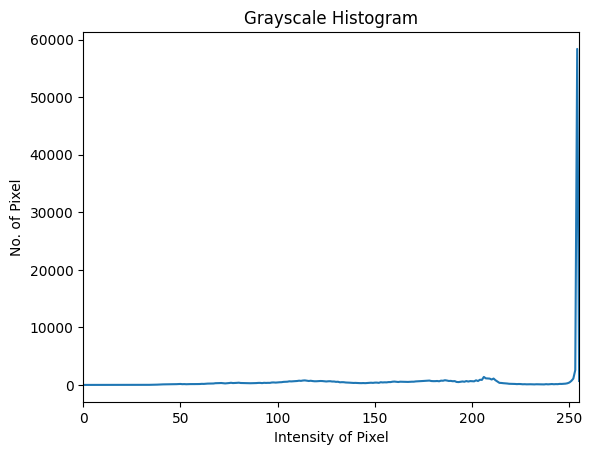

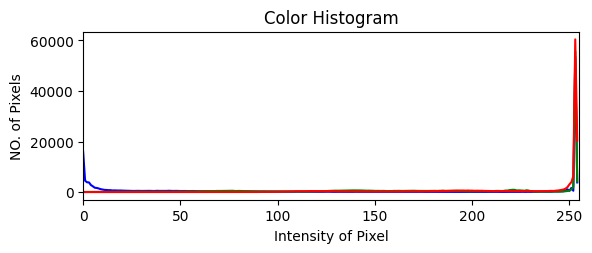

In [40]:
# Histogram Computation: calcHist --> 5 params: list of images, channels, mask, histSize, range(2nd is excluded)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)
cv.waitKey(0)
grayHist = cv.calcHist([gray], [0], None, [256], [0,256])

plt.subplot(111)
plt.title('Grayscale Histogram')
plt.xlabel('Intensity of Pixel')
plt.ylabel('No. of Pixel')
plt.plot(grayHist)
plt.xlim([0,255])
plt.show()

plt.subplot(212) #212 --> 2: rows, 1: columns, 2: plot number
plt.title('Color Histogram')
plt.xlabel('Intensity of Pixel')
plt.ylabel('NO. of Pixels')

channels = ('b', 'g', 'r')
for i, c in enumerate(channels):
    hist = cv.calcHist([img], [i], None, [255], [0, 256])
    plt.plot(hist, color=c)
    plt.xlim([0, 255])
plt.show()